In [1]:
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [4]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [5]:
df.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


# Visualisation

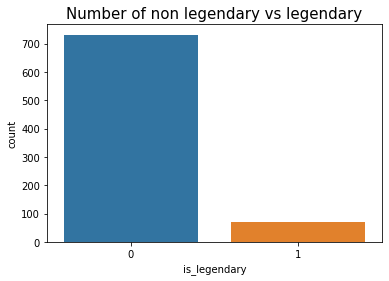

In [6]:
sns.countplot(df.is_legendary)
plt.title('Number of non legendary vs legendary', fontsize=15, ha='center')
plt.show()

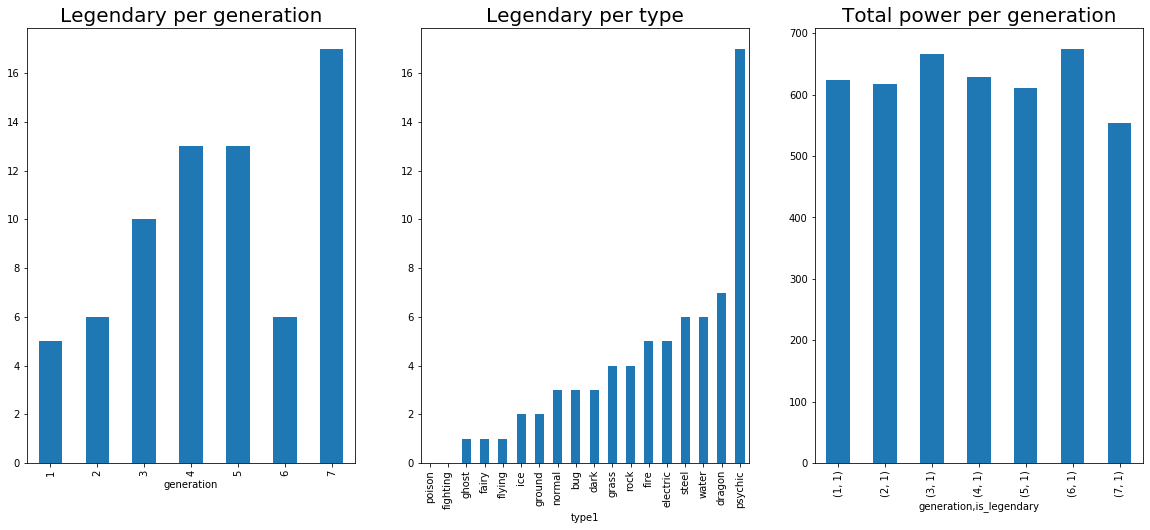

In [114]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
df.groupby(['generation'])['is_legendary'].sum().plot.bar()
plt.title('Legendary per generation', fontsize=20, ha='center')

plt.subplot(1,3,2)
df.groupby(['type1'])['is_legendary'].sum().sort_values().plot.bar()
plt.title('Legendary per type', fontsize=20, ha='center')

plt.subplot(1,3,3)
df1 = df.loc[df['is_legendary'] == 1]
df1.groupby(['generation', 'is_legendary'])['base_total'].mean().plot.bar()
plt.title('Total power per generation', fontsize=20, ha='center')

plt.show()

# Feature correlation

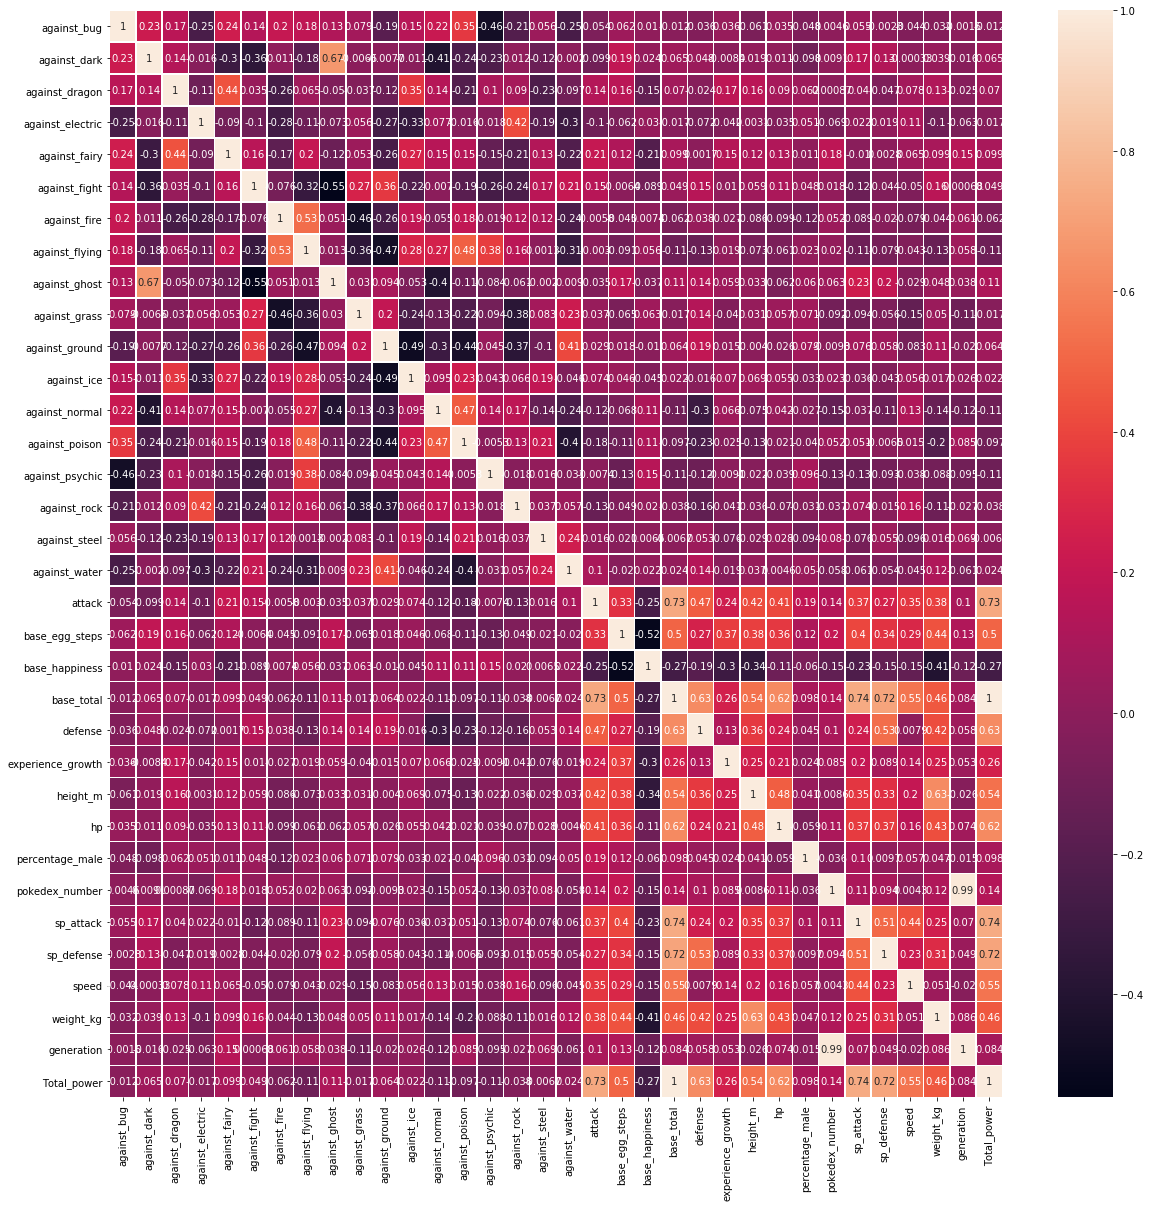

In [109]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(df.drop(['is_legendary'], axis=1).corr(), annot=True, linewidths=.5)
plt.show()

# Get_dummies

In this notebook pandas function __get_dummies__ has been utilised to process categorical columns. The aformentioned converts categorical values to a representation similar to one hot encoding. However, it splits the column containing categorical values into subcolumns in order to readjust their value. In this case, type2 column has been split into the number of its unique types (e.g. type2_rock, type2_water etc) leading to multiple new columns in the dataframe.

In [200]:
df['type2'] = df['type2'].fillna(0)

In [210]:
df1 = df.drop(['abilities', 'japanese_name', 'name',
              'pokedex_number','height_m', 'weight_kg', 
              'percentage_male', 'classfication', 'capture_rate'], axis = 1)

In [223]:
X = df1.drop(['is_legendary'], axis = 1)
y = df1.is_legendary

In [224]:
X = pd.get_dummies(X)

In [308]:
X.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'defense', 'experience_growth', 'hp',
       'sp_attack', 'sp_defense', 'speed', 'generation', 'type1_bug',
       'type1_dark', 'type1_dragon', 'type1_electric', 'type1_fairy',
       'type1_fighting', 'type1_fire', 'type1_flying', 'type1_ghost',
       'type1_grass', 'type1_ground', 'type1_ice', 'type1_normal',
       'type1_poison', 'type1_psychic', 'type1_rock', 'type1_steel',
       'type1_water', 'type2_0', 'type2_bug', 'type2_dark', 'type2_dragon',
       'type2_electric', 'type2_fairy', 'type2_fighting', 'type2_fire',
       'type2_flying', 'type2_ghost', 'type2_grass', 'typ

In [225]:
seed = 42

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [310]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560, 66), (241, 66), (560,), (241,))

# Feature importance

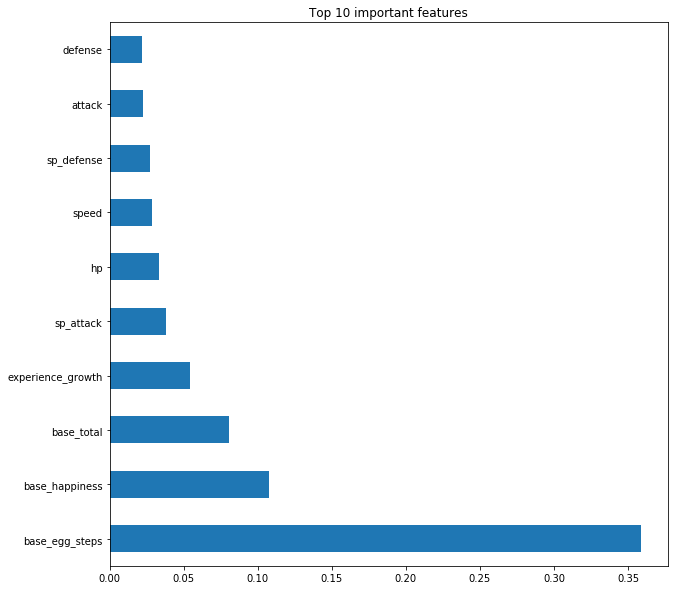

In [316]:
model = ExtraTreesClassifier(n_estimators = 100, random_state = seed)
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(figsize=(10,10), kind='barh')
plt.title('Top 10 important features')

plt.show()

# Evaluation metrics

In [231]:
def plot_roc_auc(y_test, y_pred):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    
    plt.show()

In [232]:
def binary_classification_performance(y_test, y_pred, model):
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall) 
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)
    model_name = model
    result = pd.DataFrame({
                         'Model' : [model_name],
                         'Precision' : [precision],
                         'Recall': [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]
                        })
    
    return result

# XGB Classifier

In [256]:
xgb_cl = xgb.XGBClassifier(random_state = seed)

In [257]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [258]:
y_pred = xgb_cl.predict(X_test)

In [259]:
xgb_df = binary_classification_performance(y_test, y_pred, 'XGBclassifier')
binary_classification_performance(y_test, y_pred, 'XGBclassifier')

,Model,Precision,Recall,f1 score,AUC_ROC,True Positive,True Negative,False Positive,False Negative
0,XGBclassifier,1.0,0.92,0.958333,0.96,23,216,0,2


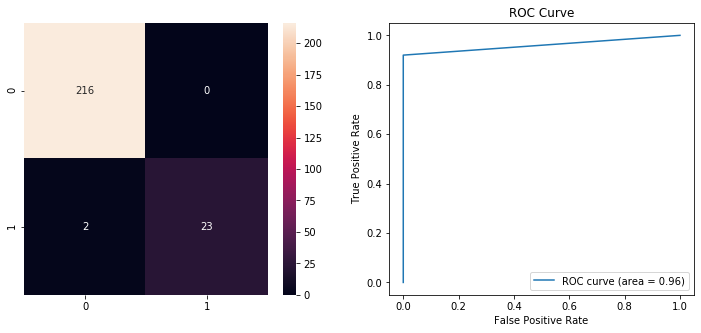

In [260]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

plt.subplot(1,2,2)
plot_roc_auc(y_test, y_pred)


plt.show()

# Logistic Regression

In [241]:
LogReg = LogisticRegression(random_state = seed)

In [242]:
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
y_pred = LogReg.predict(X_test)

In [244]:
logreg_df = binary_classification_performance(y_test, y_pred, 'Logistic regression')
logreg_df

,Model,Precision,Recall,f1 score,AUC_ROC,True Positive,True Negative,False Positive,False Negative
0,Logistic regression,1.0,0.88,0.93617,0.94,22,216,0,3


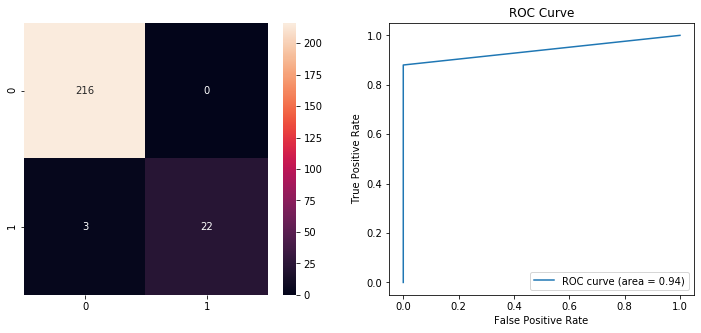

In [255]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

plt.subplot(1,2,2)
plot_roc_auc(y_test, y_pred)


plt.show()

# Naive Bayes Classifier

In [284]:
gnb = GaussianNB()

In [285]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [286]:
y_pred = gnb.predict(X_test)

In [288]:
gnb_df = binary_classification_performance(y_test, y_pred, 'Naive Bayes')
gnb_df

,Model,Precision,Recall,f1 score,AUC_ROC,True Positive,True Negative,False Positive,False Negative
0,Naive Bayes,0.766667,0.92,0.836364,0.94,23,209,7,2


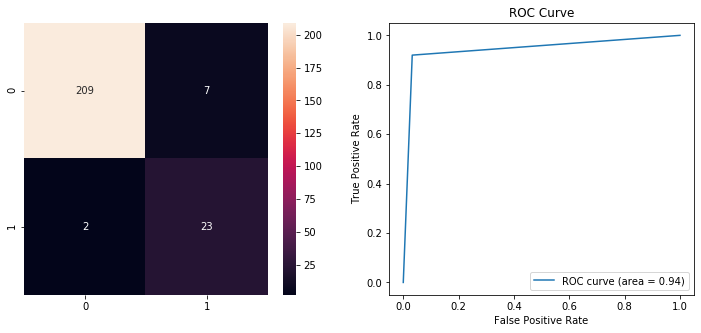

In [289]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

plt.subplot(1,2,2)
plot_roc_auc(y_test, y_pred)


plt.show()

# Model comparison

In [293]:
models = (xgb_df, logreg_df, gnb_df)

In [295]:
mod_eval = pd.concat(models)

In [300]:
mod_eval.sort_values('f1 score', ascending = False)

,Model,Precision,Recall,f1 score,AUC_ROC,True Positive,True Negative,False Positive,False Negative
0,XGBclassifier,1.000000,0.92,0.958333,0.96,23,216,0,2
0,Logistic regression,1.000000,0.88,0.936170,0.94,22,216,0,3
0,Naive Bayes,0.766667,0.92,0.836364,0.94,23,209,7,2
